In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os

In [4]:
print(os.listdir())

['.ipynb_checkpoints', '1.Pandas-Series.ipynb', '2.Pandas-DataFrame.ipynb', '2.Tricks-Dummy Variables.ipynb', '3.Pandas Tricks.ipynb', '3.Pandas-Missing Data.ipynb', '4.Pandas - Group By.ipynb', '911.csv', 'advertising.csv', 'Data Alignment and sort Rank.ipynb', 'heroes_information.csv', 'imdb.csv', 'imdb.xlsx', 'movies.csv', 'Pandas Tricks 1.ipynb', 'police.csv', 'pycon-2018-tutorial-master', 'pycon-2018-tutorial-master.zip', 'Salaries.csv', 'ted.csv', 'titanic_test.csv', 'titanic_train.csv', 'Untitled.ipynb', 'USA_Housing.csv']


In [5]:
df = pd.read_csv('police.csv')

In [6]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86406 non-null object
driver_age_raw        86414 non-null float64
driver_age            86120 non-null float64
driver_race           86408 non-null object
violation_raw         86408 non-null object
violation             86408 non-null object
search_conducted      91741 non-null bool
search_type           3196 non-null object
stop_outcome          86408 non-null object
is_arrested           86408 non-null object
stop_duration         86408 non-null object
drugs_related_stop    91741 non-null bool
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+ MB


In [8]:
df.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [9]:
df.shape

(91741, 15)

In [10]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

## Finding Missing Values

In [11]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Exercise -1   -Removing Missing value columns

In [12]:
df.drop('county_name',axis=1,inplace=True)

In [13]:
df.shape

(91741, 14)

In [14]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [15]:
df.dropna(axis=1,how='all').head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [16]:
df.dropna(axis=1,how='all').shape

(91741, 14)

## Do men or women speed more often?

In [17]:
df[['driver_gender','violation']].head()

,driver_gender,violation
0,M,Speeding
1,M,Speeding
2,M,Speeding
3,M,Other
4,F,Speeding


In [18]:
df[df['violation']=='Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [19]:
df[df['driver_gender']=='F'].violation.value_counts()

Speeding               15482
Moving violation        3204
Equipment               2487
Registration/plates     1013
Other                    690
Seat belt                635
Name: violation, dtype: int64

In [20]:
df[df['driver_gender']=='F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [21]:
df.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

## Does gender affect who gets searched during a stop?

In [22]:
df.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [23]:
df.search_conducted.mean()

0.03483720473942948

In [24]:
df.groupby(['violation','driver_gender']).search_conducted.value_counts(normalize=True)

violation            driver_gender  search_conducted
Equipment            F              False               0.957378
                                    True                0.042622
                     M              False               0.929919
                                    True                0.070081
Moving violation     F              False               0.963795
                                    True                0.036205
                     M              False               0.940169
                                    True                0.059831
Other                F              False               0.943478
                                    True                0.056522
                     M              False               0.952854
                                    True                0.047146
Registration/plates  F              False               0.933860
                                    True                0.066140
                     M              F

## 4.why is search type is missing very often?

In [25]:
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [26]:
df.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Incident t

## 5.During a search ,how often is the driver frisked?

In [27]:
df['frisk'] = df.search_type.str.contains('Protective Frisk')

In [28]:
df.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

## 6.which year had the least number of stops?

In [29]:
df[['stop_date','stop_time']].head()

,stop_date,stop_time
0,2005-01-02,01:55
1,2005-01-18,08:15
2,2005-01-23,23:15
3,2005-02-20,17:15
4,2005-03-14,10:00


In [30]:
df.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [31]:
date_time = df.stop_date.str.cat(df.stop_time,sep=' ')

In [32]:
date_time.head(10)

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
5    2005-03-23 09:45
6    2005-04-01 17:30
7    2005-06-06 13:20
8    2005-07-13 10:15
9    2005-07-13 15:45
Name: stop_date, dtype: object

###### changing dataType

In [33]:
df['stop_datetime'] = pd.to_datetime(date_time)

In [34]:
df.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [35]:
df.stop_datetime.dt.month.value_counts()

1     8479
5     7935
11    7877
10    7745
3     7742
6     7630
8     7615
7     7568
4     7529
9     7427
12    7152
2     7042
Name: stop_datetime, dtype: int64

## 7.how does drug activity change by time of day?

In [36]:
df[['stop_datetime','drugs_related_stop']].head()

,stop_datetime,drugs_related_stop
0,2005-01-02 01:55:00,False
1,2005-01-18 08:15:00,False
2,2005-01-23 23:15:00,False
3,2005-02-20 17:15:00,False
4,2005-03-14 10:00:00,False


In [37]:
df[['stop_datetime','drugs_related_stop']].mean()

drugs_related_stop    0.008884
dtype: float64

In [38]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

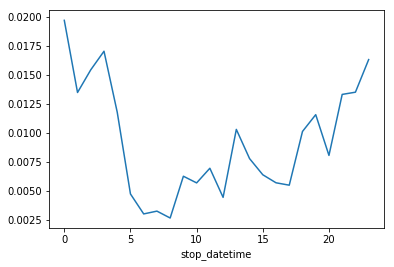

In [39]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

## 8.Do most stops occur at night?

In [40]:
df.stop_datetime.dt.hour.value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

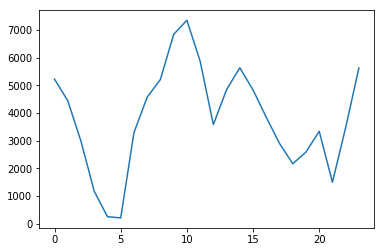

In [41]:
df.stop_datetime.dt.hour.value_counts().sort_index().plot()



## 9.Find the bad in the stop_duration column and fix it

In [42]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [43]:
df[(df.stop_duration == '1')|(df.stop_duration=='2')]


,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
55873,2012-01-23,11:17,M,1960.0,52.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Passenger,True,2,False,NaN,2012-01-23 11:17:00
76624,2014-04-13,08:34,F,1965.0,49.0,White,Speeding,Speeding,False,NaN,Citation,False,1,False,NaN,2014-04-13 08:34:00


In [44]:
df[(df.stop_duration == '1')|(df.stop_duration=='2')]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
55873,2012-01-23,11:17,M,1960.0,52.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Passenger,True,2,False,NaN,2012-01-23 11:17:00
76624,2014-04-13,08:34,F,1965.0,49.0,White,Speeding,Speeding,False,NaN,Citation,False,1,False,NaN,2014-04-13 08:34:00


In [57]:
df[df['stop_duration']=='1'].replace('1',np.nan,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [70]:
df[df['stop_duration']=='2']

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
55873,2012-01-23,11:17,M,1960.0,52.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Passenger,True,2,False,NaN,2012-01-23 11:17:00


In [67]:
df.loc[76624,'stop_duration']=np.nan

In [69]:
df.loc[76624,'stop_duration']

nan

In [71]:
df.loc[55873,'stop_duration']

'2'

In [72]:
df.loc[55873,'stop_duration']=np.nan

In [73]:
df.loc[55873,'stop_duration']

nan

In [75]:
df['stop_duration'].value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [76]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00
